In [ ]:
# PCA
# PCA 실행 후 모든 분산을 다 고려하면 하기 전과 차이가 없게 된다.
# PCA 변수 추출 개수는 설명력을 고려해서 선택
# PCA 결과 고유 벡터는 서로 직교하게 된다.
# 설명 분산을 내림차순으로 정렬하기 위해 고유 값을 이용
# "선형" 변환 기법으로 비선형적인 매니폴드를 학습하기 어렵다.
# 전체 데이터셋의 공분산행렬에 대해 고윳값 분해를 수행
# 입력 데이터의 분산을 최대한으로 하는 축을 찾는 방법

# 분석 후 모든 축은 orthogonal 하다.
# 변환 결과는 mean-centered data이다. (StandardScaler)
# 변수의 선형 조합으로 계산된다.

# Eigenvalue의 크기에 따라 내림차순으로 정렬한다. (Eigenvector가 아님)
# 고유벡터 자체의 크기(norm)는 1로 정규화

# PCA로 변수를 줄인 후, 회귀분석 시 과적합을 예방할 수 있다. (과소적합이 생길 가능성은 높아진다.)

전체 데이터셋의 공분산행렬에 대해 고윳값 분해를 수행한다.

In [ ]:
# PCA로 변수를 줄인 후, 회귀분석 시 손실 함수의 수렴이 부드러워진다.
# → 차원이 줄어들어 변수가 적고 상관관계도 줄어들기 때문에 최적화가 더 안정적이고 수렴 속도가 좋아질 수 있으나 절대적인 것은 아니다.

In [ ]:
분석 후 모든 축은 orthogonal 하다.
변환 결과는 mean-centered data이다.
변수의 선형 조합으로 계산된다.

Eigenvalue의 크기에 따라 내림차순으로 정렬한다. (Eigen vector가 아님)
PCA에서 고유값은 각 주성분이 설명하는 분산의 크기를 나타낸다.
주성분은 고유값이 큰 순서대로(분산이 큰 순서대로) 정렬
고유벡터는 단위 벡터(norm = 1)로 정규화되어 사용되므로, 크기 자체는 모두 동일

In [ ]:
PCA는 입력의 다중공선성(multicollinearity)을 줄여줄 수는 있으나, 손실 함수의 수렴과 직접적인 관련성은 제한적입니다.
정확히 말하면 “학습 안정성”이 간접적으로 향상될 수는 있음.

PCA는 차원을 축소하므로 오히려 과소적합(underfitting) 의 가능성이 증가할 수 있습니다.
모델이 학습할 정보가 줄어들면 복잡한 패턴을 포착하기 어려워질 수 있기 때문입니다.
PCA는 과적합(overfitting)을 줄이는 데 도움이 되며, 과소적합을 예방하는 역할은 아님.

In [ ]:
# Mean centroid 된 데이터에 대하여 공분산 행렬을 구한다.
# 공분한 행렬의 고유 값과 고유 벡터를 구한다.
# 고유 값이 큰 순서대로 고유 벡터로 정사영하여 차원을 축소

In [1]:
import numpy as np

# 원본 데이터 (5개 샘플, 2차원)
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0]
])

# 평균 중심화 (mean centering)
X_meaned = X - np.mean(X, axis=0)

print("Mean-centered X:\n", X_meaned)

Mean-centered X:
 [[ 0.46  0.16]
 [-1.54 -1.54]
 [ 0.16  0.66]
 [-0.14 -0.04]
 [ 1.06  0.76]]


In [2]:
# 공분산 행렬 (열 방향이 변수)
cov_matrix = np.cov(X_meaned, rowvar=False)
print("\nCovariance Matrix:\n", cov_matrix)


Covariance Matrix:
 [[0.938  0.8405]
 [0.8405 0.853 ]]


In [3]:
# 고유값과 고유벡터
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

print("\nEigenvalues:\n", eig_vals)
print("\nEigenvectors:\n", eig_vecs)


Eigenvalues:
 [1.73707382 0.05392618]

Eigenvectors:
 [[ 0.72474155 -0.68902082]
 [ 0.68902082  0.72474155]]


In [4]:
import numpy as np
from sklearn.decomposition import PCA

# 1. 원본 데이터
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0]
])

# 2. 평균 중심화
X_meaned = X - np.mean(X, axis=0)

# 3. 공분산 행렬
cov_matrix = np.cov(X_meaned, rowvar=False)

# 4. 고유값, 고유벡터
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# 5. sklearn PCA 사용
pca = PCA()
pca.fit(X)

# 결과 비교
print("=== Numpy 계산 ===")
print("고유값:\n", eig_vals)
print("고유벡터:\n", eig_vecs)

print("\n=== sklearn PCA ===")
print("고유값 (explained_variance_):\n", pca.explained_variance_)
print("고유벡터 (components_):\n", pca.components_)

=== Numpy 계산 ===
고유값:
 [1.73707382 0.05392618]
고유벡터:
 [[ 0.72474155 -0.68902082]
 [ 0.68902082  0.72474155]]

=== sklearn PCA ===
고유값 (explained_variance_):
 [1.73707382 0.05392618]
고유벡터 (components_):
 [[-0.72474155 -0.68902082]
 [-0.68902082  0.72474155]]


In [5]:
sorted_idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_idx]
eig_vecs = eig_vecs[:, sorted_idx]

In [6]:
eig_vals

array([1.73707382, 0.05392618])

In [7]:
eig_vecs

array([[ 0.72474155, -0.68902082],
       [ 0.68902082,  0.72474155]])

In [8]:
import numpy as np

# 1. 원본 데이터
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0]
])

# 2. 평균 중심화
X_meaned = X - np.mean(X, axis=0)

# 3. 공분산 행렬
cov_matrix = np.cov(X_meaned, rowvar=False)

# 4. 고유값과 고유벡터
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# 5. 고유값 내림차순 정렬
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

# 6. 가장 큰 고유값에 대응하는 고유벡터 1개 선택 (차원 축소용)
principal_component = eig_vecs[:, 0].reshape(-1, 1)  # shape: (2, 1)

# 7. 정사영 (1D로 축소)
X_pca = X_meaned @ principal_component  # shape: (5, 1)

# 8. 결과 출력
print("고유값 순서:", eig_vals)
print("주성분 벡터 (1개):\n", principal_component)
print("PCA 축소 결과 (1D):\n", X_pca)


고유값 순서: [1.73707382 0.05392618]
주성분 벡터 (1개):
 [[0.72474155]
 [0.68902082]]
PCA 축소 결과 (1D):
 [[ 0.44362444]
 [-2.17719404]
 [ 0.57071239]
 [-0.12902465]
 [ 1.29188186]]


In [10]:
pca.fit_transform(X)

array([[-0.44362444, -0.20099093],
       [ 2.17719404, -0.05500992],
       [-0.57071239,  0.36808609],
       [ 0.12902465,  0.06747325],
       [-1.29188186, -0.17955849]])

In [11]:
import numpy as np
from sklearn.decomposition import PCA

# 1. 원본 데이터
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0]
])

# 2. 평균 중심화
X_meaned = X - np.mean(X, axis=0)

# 3. 공분산 행렬 → 고유값 / 고유벡터
cov_matrix = np.cov(X_meaned, rowvar=False)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# 4. 고유값 내림차순 정렬
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

# 5. 주성분 1개 선택
principal_component = eig_vecs[:, 0].reshape(-1, 1)

# 6. 수동 PCA 변환
X_pca_manual = X_meaned @ principal_component  # (5, 1)

# 7. sklearn PCA
pca = PCA(n_components=1)
X_pca_sklearn = pca.fit_transform(X)  # (5, 1)

# 8. 비교 출력
print("=== 수동 PCA 결과 ===")
print(X_pca_manual)

print("\n=== sklearn PCA 결과 ===")
print(X_pca_sklearn)

# 9. 부호 차이 확인
sign_correction = np.sign(np.corrcoef(X_pca_manual.ravel(), X_pca_sklearn.ravel())[0, 1])
X_pca_manual_aligned = X_pca_manual * sign_correction

# 10. 차이 확인
print("\n두 결과 차이 (부호 정렬 후):")
print(np.round(X_pca_manual_aligned - X_pca_sklearn, 6))

=== 수동 PCA 결과 ===
[[ 0.44362444]
 [-2.17719404]
 [ 0.57071239]
 [-0.12902465]
 [ 1.29188186]]

=== sklearn PCA 결과 ===
[[-0.44362444]
 [ 2.17719404]
 [-0.57071239]
 [ 0.12902465]
 [-1.29188186]]

두 결과 차이 (부호 정렬 후):
[[ 0.]
 [ 0.]
 [ 0.]
 [-0.]
 [ 0.]]


In [ ]:
# SVD
# 고유값 분해는 정방 행렬만 분해 가능
# SVD는 정방 행렬이 아니어도 가능 (m x n)
# A A.T는 m x m이므로 고유값 분해로 고유벡터 U를 구한다.
# A.T A는 n x n이므로 고유값 분해로 고유벡터 V를 구할 수 있다.
# 특이값의 제곱은 고유값이다.

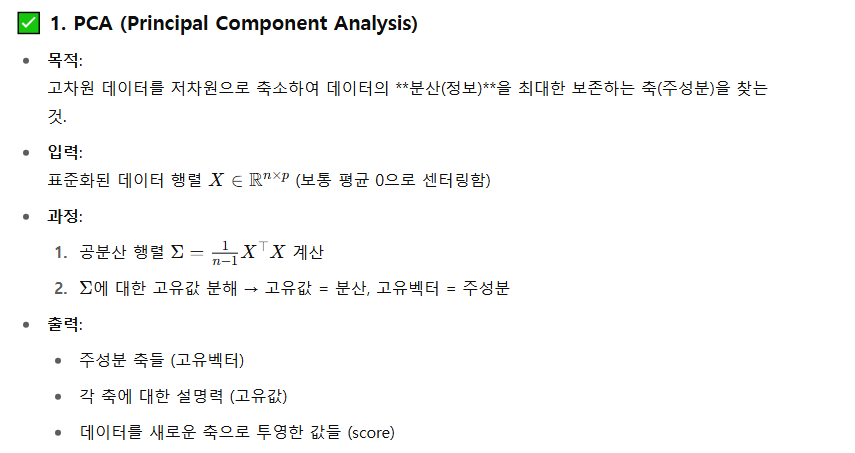
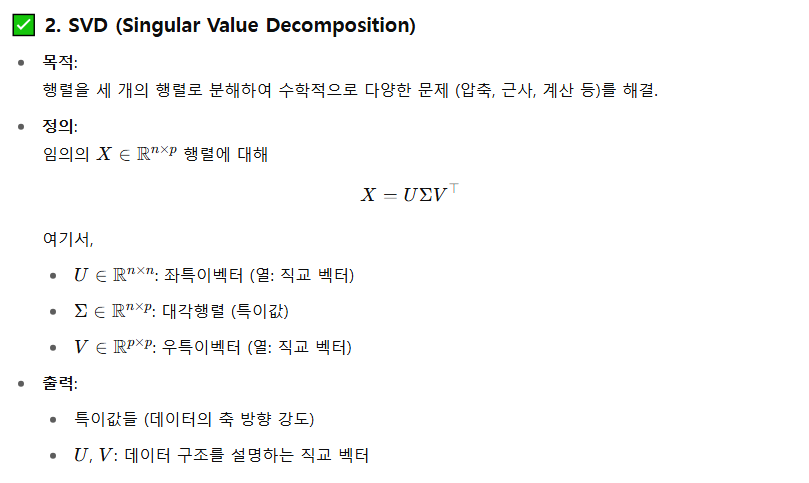
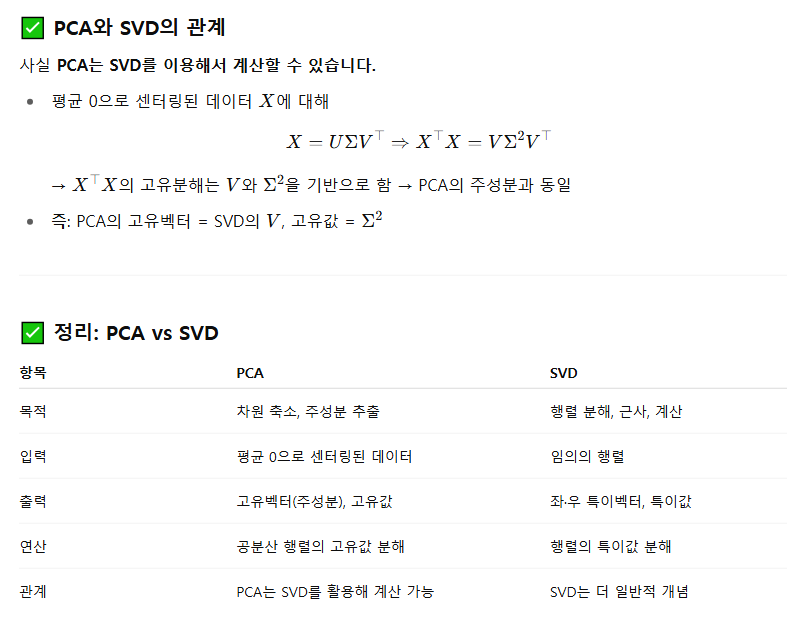

In [2]:
import numpy as np

# 1. 예제 행렬 (3x2)
A = np.array([[1, 2],
              [3, 4],
              [5, 6]])

# 2. SVD 분해
U, S, VT = np.linalg.svd(A, full_matrices=False)

print("=== 특이값 분해 (SVD) ===")
print("U (좌 특이벡터):\n", U)
print("\nS (특이값):\n", S)
print("\nVT (우 특이벡터 전치):\n", VT)

# 3. 고유값 분해: A^T A
ATA = A.T @ A
eigvals, eigvecs = np.linalg.eig(ATA)

# 정렬 (내림차순)
sorted_idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[sorted_idx]
eigvecs = eigvecs[:, sorted_idx]

print("\n=== 고유값 분해 (A^T A) ===")
print("고유값:\n", eigvals)
print("\n고유벡터:\n", eigvecs)

# 4. 비교: 특이값 제곱 = 고유값
print("\n=== 비교 ===")
print("특이값 제곱:\n", S**2)

=== 특이값 분해 (SVD) ===
U (좌 특이벡터):
 [[-0.2298477   0.88346102]
 [-0.52474482  0.24078249]
 [-0.81964194 -0.40189603]]

S (특이값):
 [9.52551809 0.51430058]

VT (우 특이벡터 전치):
 [[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]

=== 고유값 분해 (A^T A) ===
고유값:
 [90.73549491  0.26450509]

고유벡터:
 [[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]

=== 비교 ===
특이값 제곱:
 [90.73549491  0.26450509]


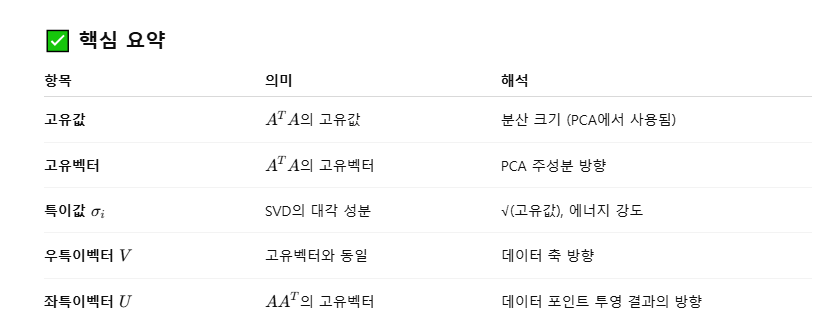

### 특이값 분해, 고윳값 분해
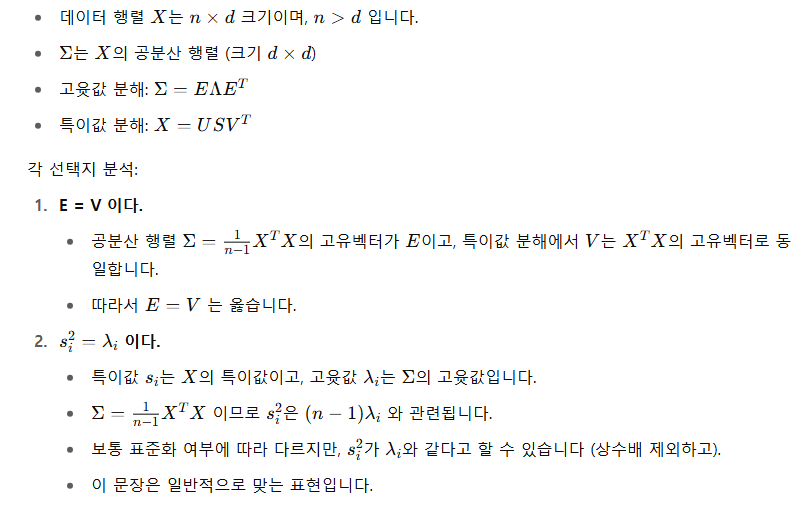
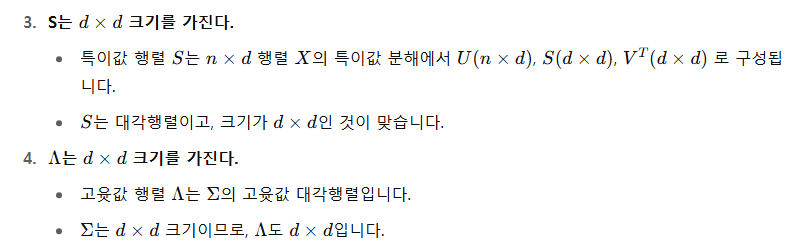
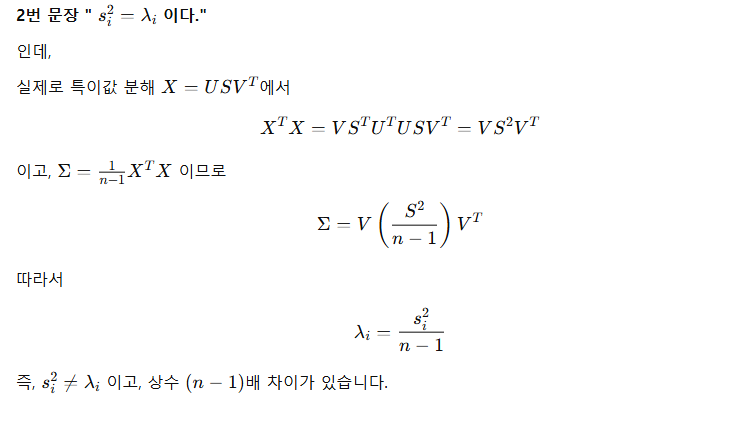